In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [21]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'iso_aur_test/'
s = h5py.File(datadir+simulation+'snapdir_010/snapshot_010.0.hdf5', 'r')

In [22]:
data = np.loadtxt(datadir+simulation+'oneclustershocks.txt')

In [23]:
time = s['Header'].attrs['Time']
unit_time = s['Header'].attrs['UnitLength_in_cm']/s['Header'].attrs['UnitVelocity_in_cm_per_s']
unit_mass = s['Header'].attrs['UnitMass_in_g']
gyr = 3.15569e16
solarmass = 1.989e33

In [24]:
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

In [25]:
time_gyr = time*unit_time/gyr
tensor_gyr_2 = tensor_eigenvalues * (gyr/unit_time)**2
init_mass = init_mass*unit_mass/solarmass

In [26]:
unique, counts = np.unique(init_mass, return_counts=True)
idx = np.argsort(counts)

In [27]:
mass = unique[idx[-1]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
tensor_gyr_2_unique = tensor_gyr_2[mask]

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None]

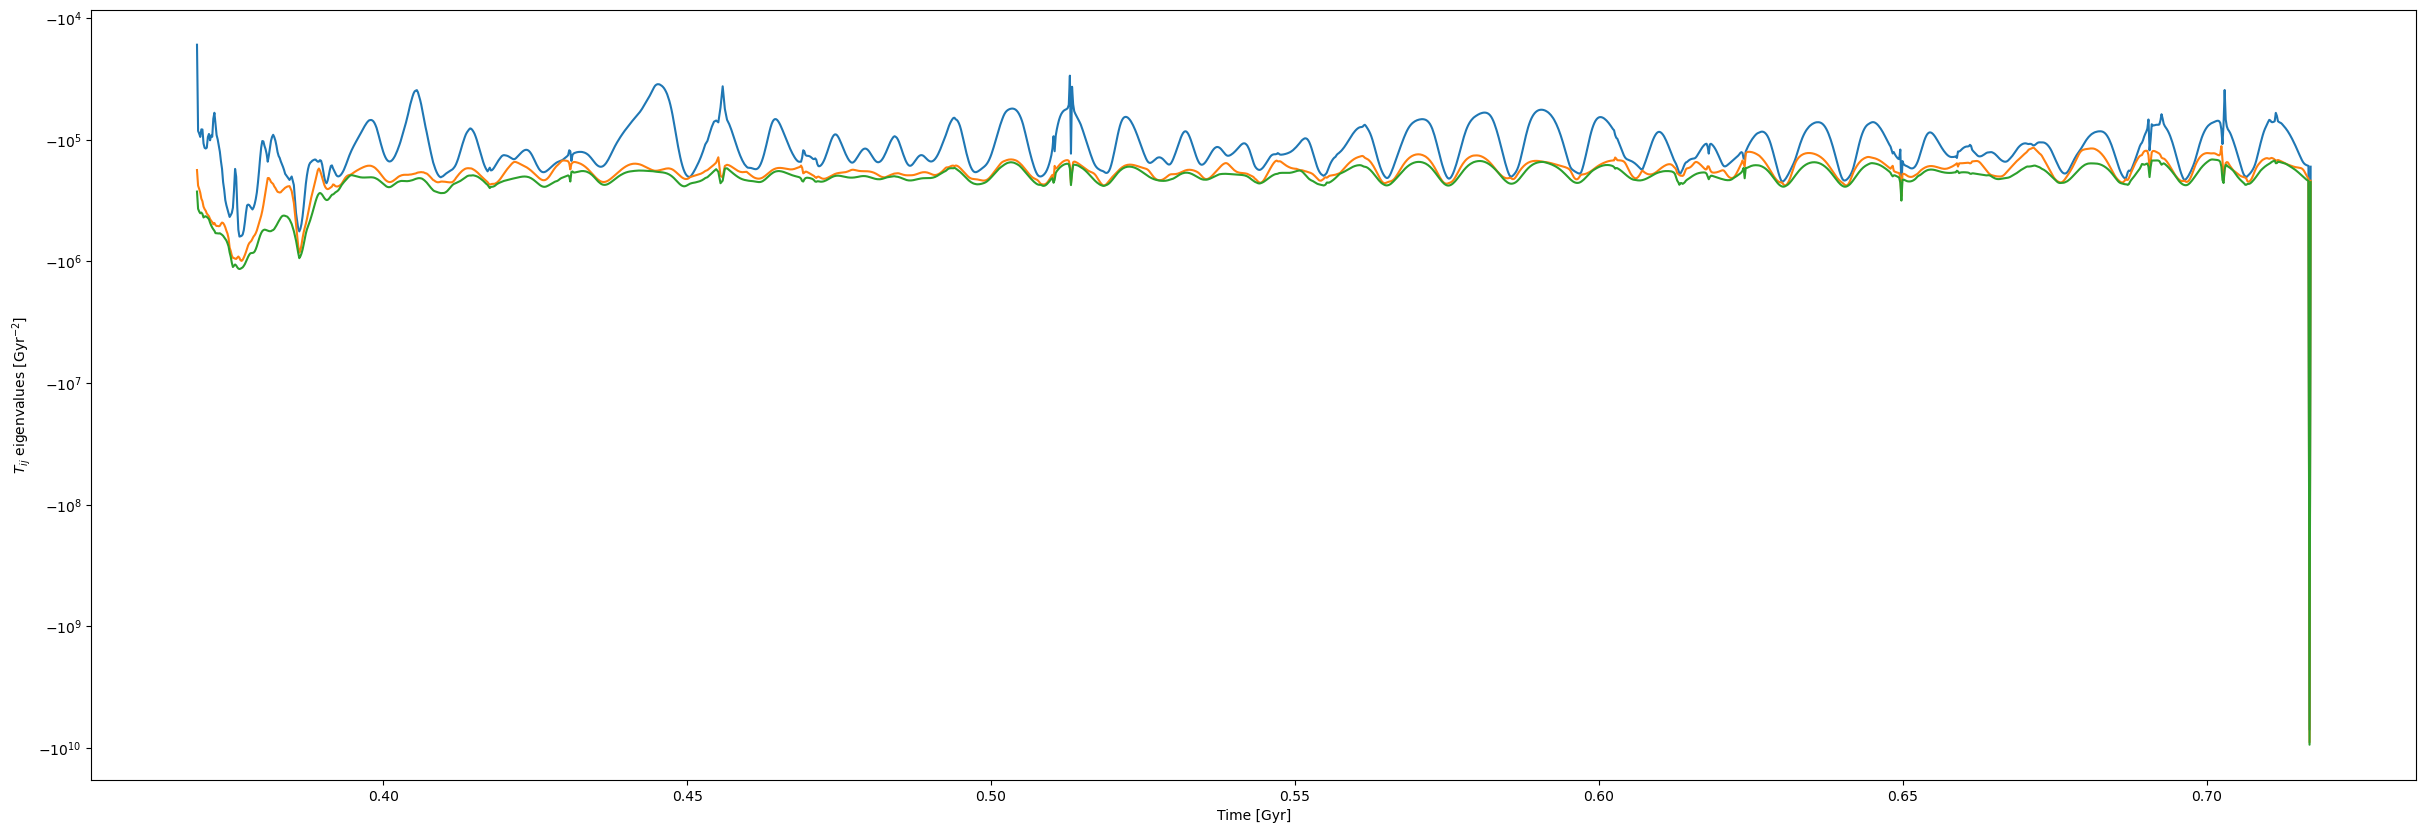

In [28]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_gyr_2_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog')

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None]

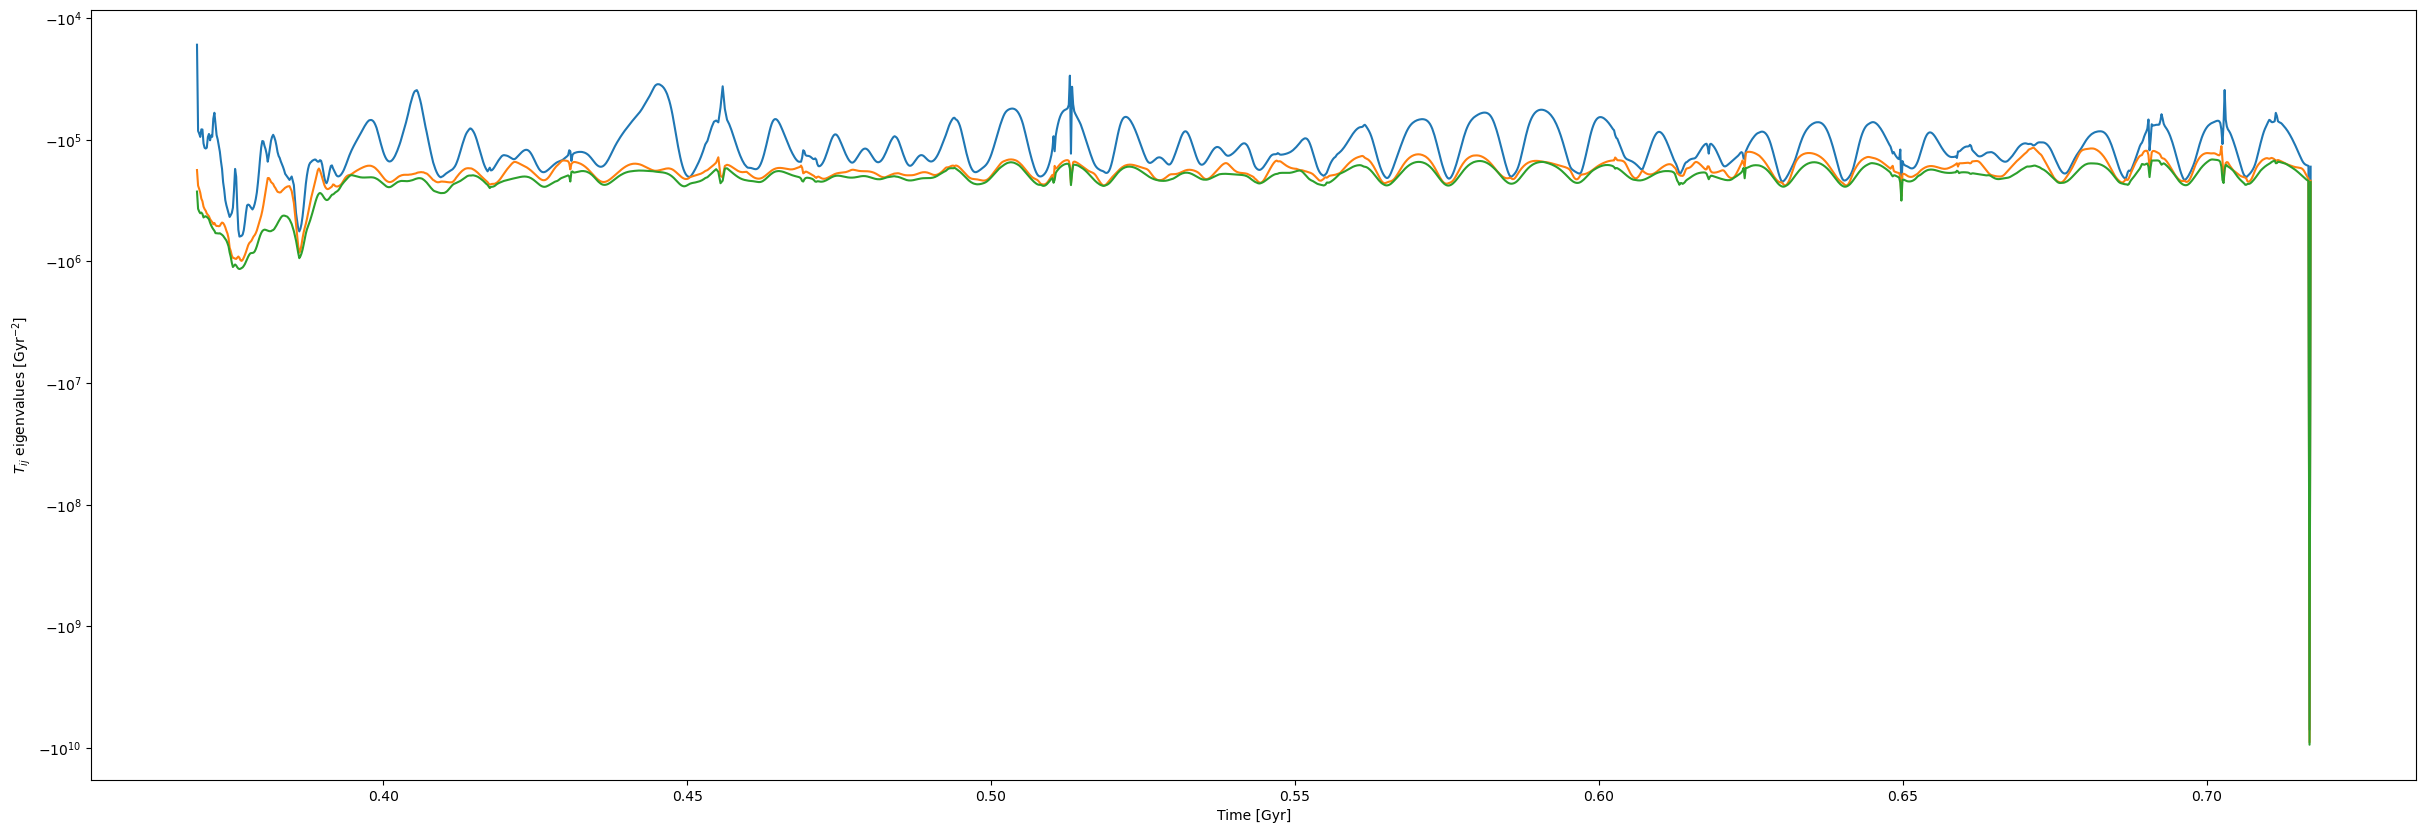

In [19]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_gyr_2_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog')

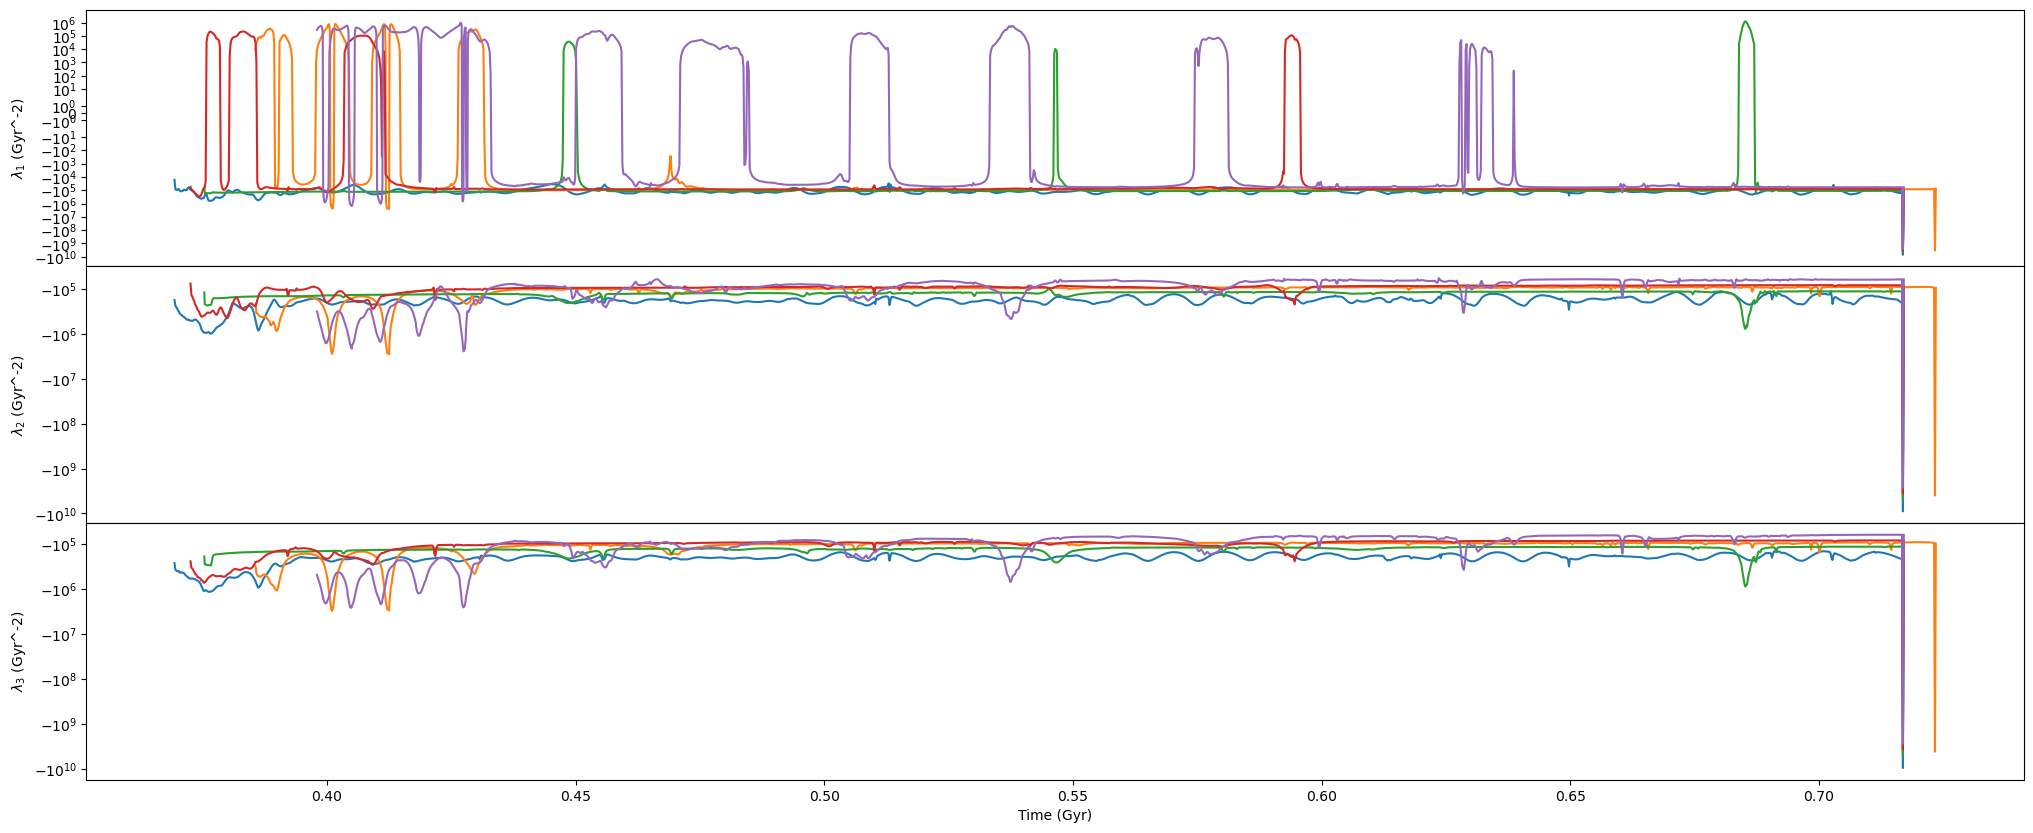

In [29]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
for i in range(5):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    tensor_gyr_2_unique = tensor_gyr_2[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,0][np.argsort(time_gyr_unique)])
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,1][np.argsort(time_gyr_unique)])
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,2][np.argsort(time_gyr_unique)])
        
ax[2].set(xlabel='Time (Gyr)')
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)
# fig.text(.1, 0.5, 'Tidal tensor eigenvalues (Gyr^-2)', va='center', rotation='vertical')

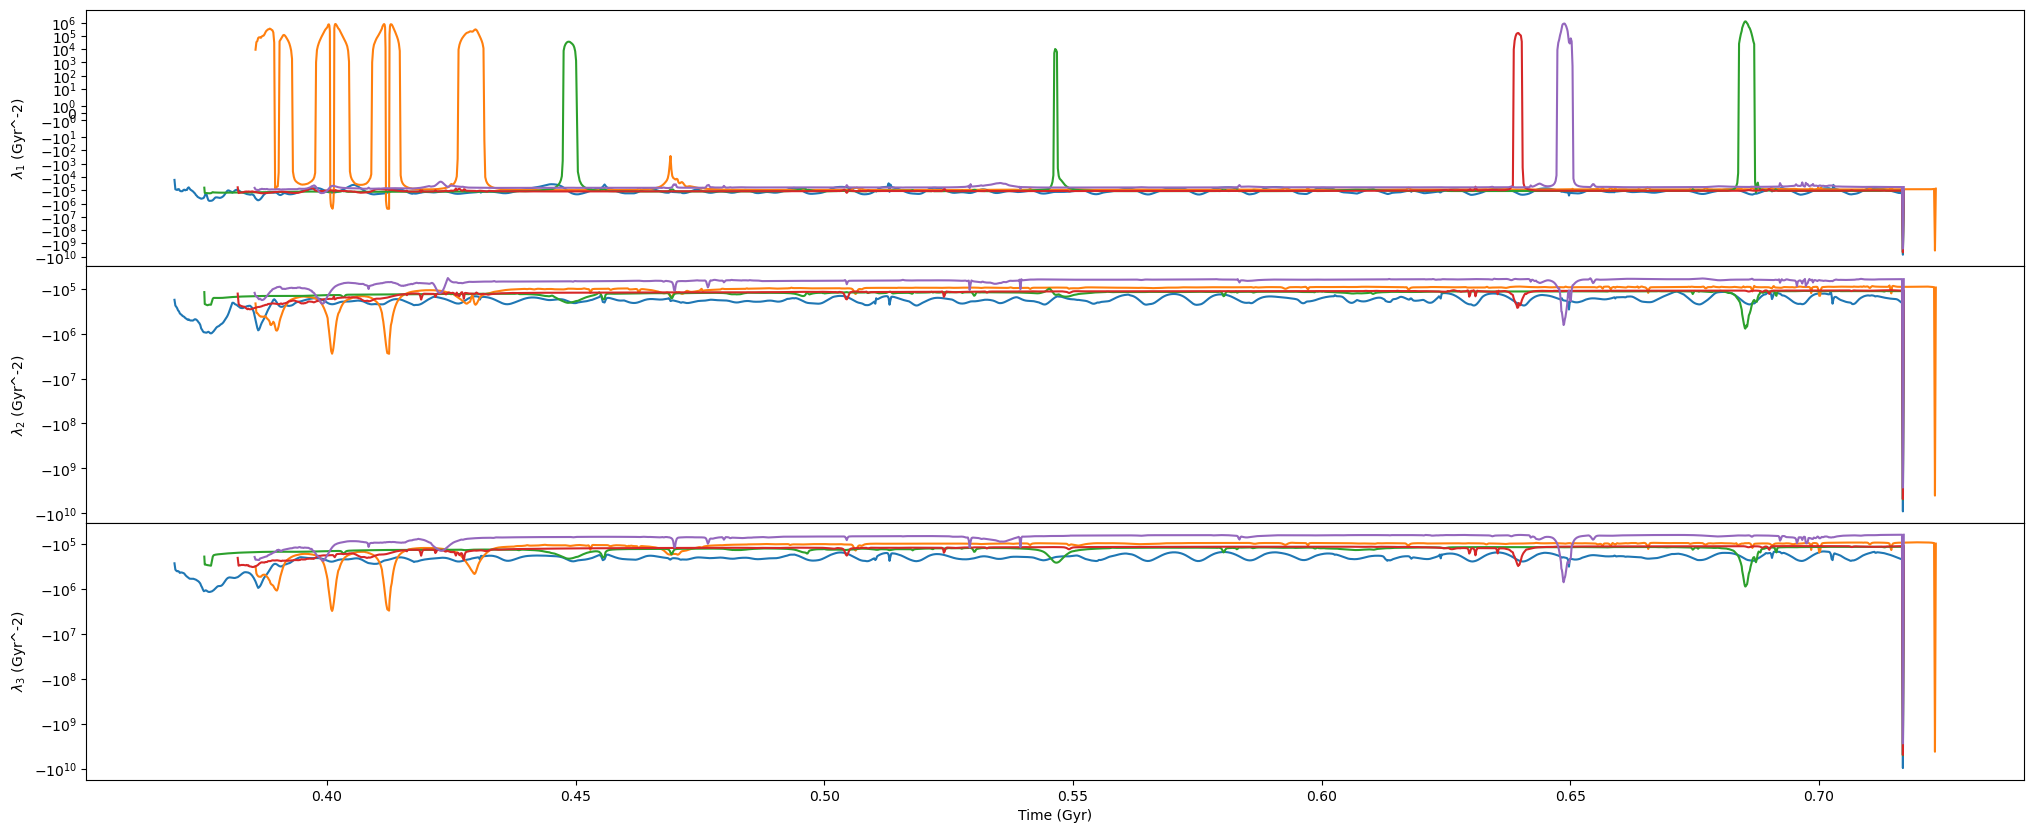

In [20]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
for i in range(5):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    tensor_gyr_2_unique = tensor_gyr_2[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,0][np.argsort(time_gyr_unique)])
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,1][np.argsort(time_gyr_unique)])
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,2][np.argsort(time_gyr_unique)])
        
ax[2].set(xlabel='Time (Gyr)')
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)
# fig.text(.1, 0.5, 'Tidal tensor eigenvalues (Gyr^-2)', va='center', rotation='vertical')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

# Load simulation data
simulation = 'Au23_lvl4'
s = pynbody.load(simulation+'/snapdir_127/snapshot_127')

# Load shock evolution data
data = np.loadtxt(simulation+'/oneclustershocks.txt')

# Extract data
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

# Convert time column to Gyr
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

# Convert tensor data to Gyr^-2
gyr = 3.15576e16 # in s
unit_time = s.properties['UnitLength_in_cm']/s.properties['UnitVelocity_in_cm_per_s']
h = s.properties['h']
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

tensor_eigenvalues *= convert_factor[:, np.newaxis]

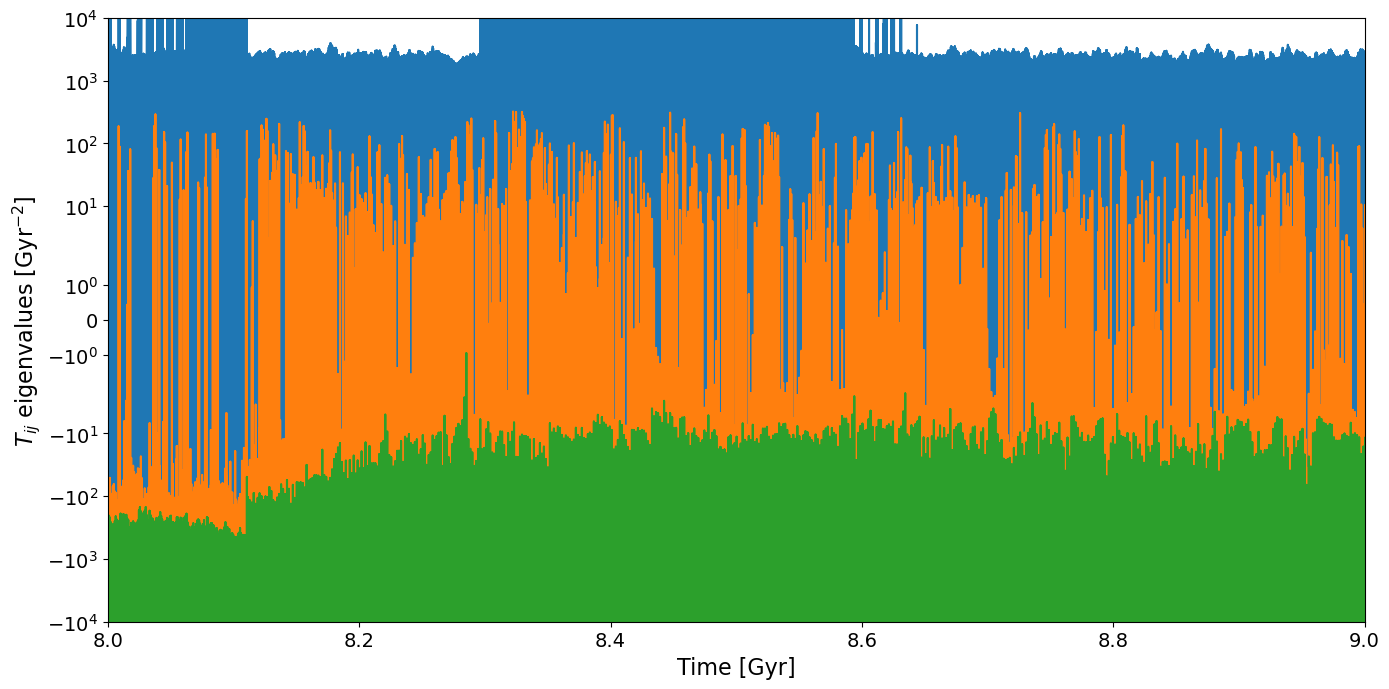

In [11]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for i in range(tensor_eigenvalues.shape[1]):
  ax.plot(time_gyr, tensor_eigenvalues[:,i])
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel(r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', fontsize=16)
ax.set_yscale('symlog')
ax.set(xlim=(8,9), ylim=(-1e4, 1e4))
ax.tick_params(axis='both', which='both', labelsize=14)
plt.tight_layout()
# plt.savefig('shock_evolutions.png')

In [12]:
sort_mass = np.argsort(init_mass)
init_mass = init_mass[sort_mass]
time_gyr = time_gyr[sort_mass]
tensor_eigenvalues = tensor_eigenvalues[sort_mass]

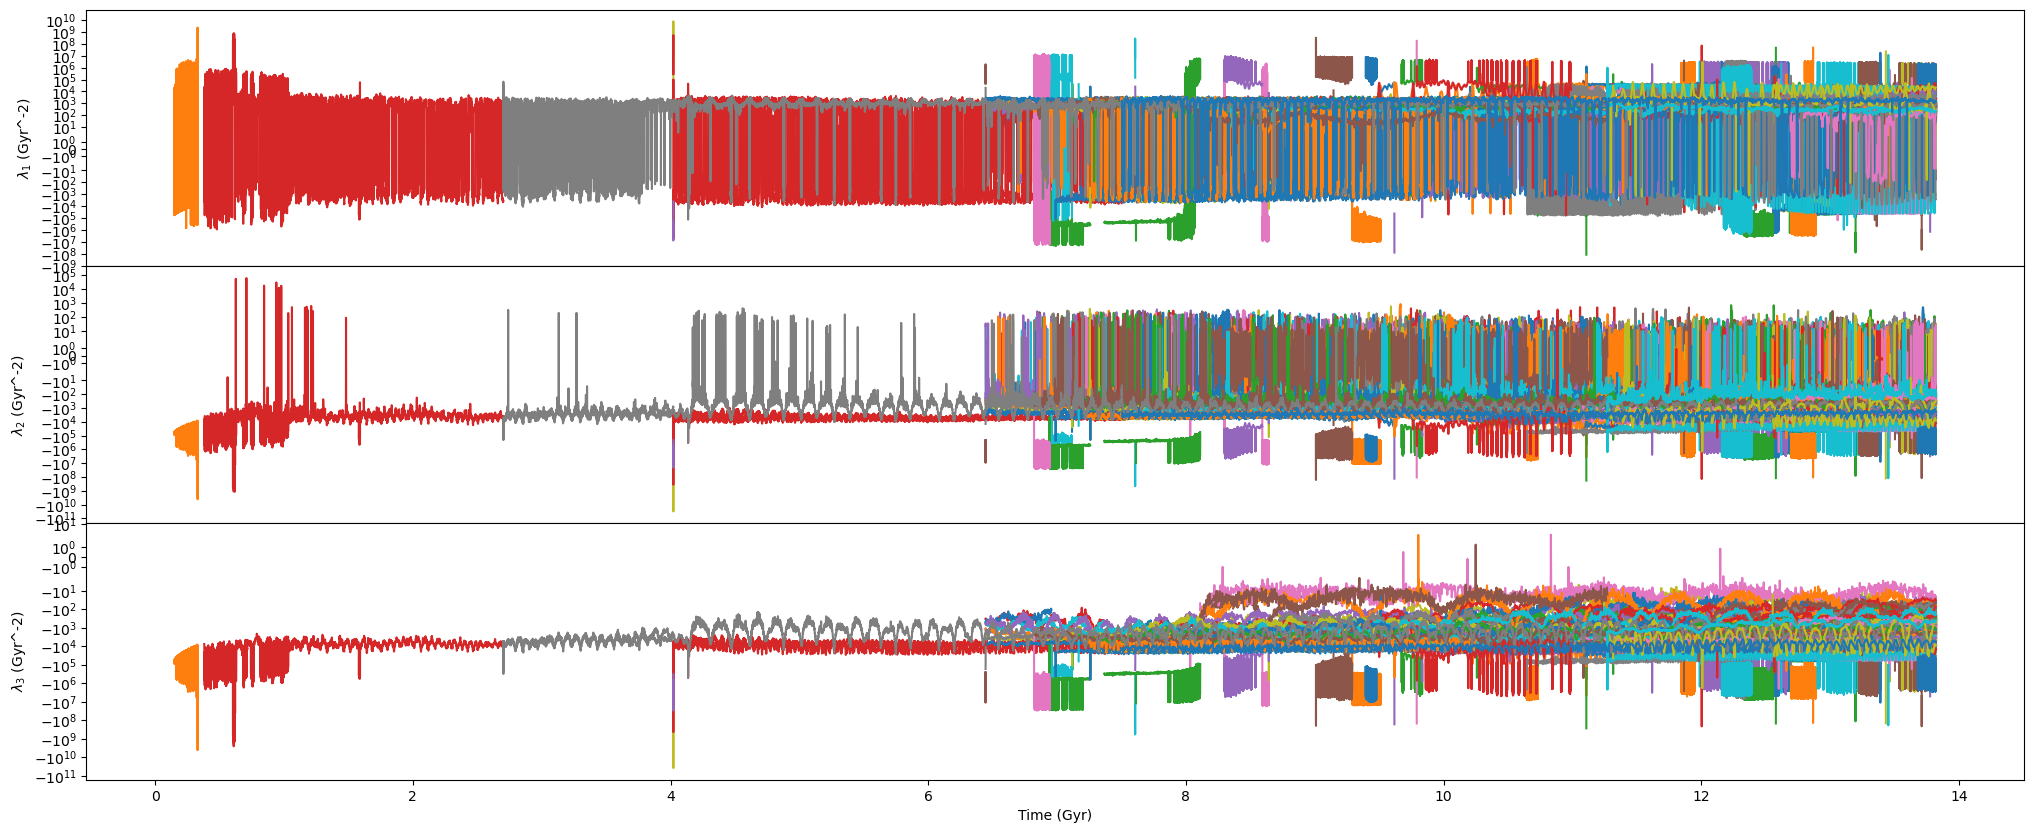

In [13]:
# Plot
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
mass = init_mass[0]
time_plot = []
tensor_eig1_plot = []
tensor_eig2_plot = []
tensor_eig3_plot = []
for i, newmass in enumerate(init_mass):
    if newmass == mass:
        time_plot.append(time_gyr[i])
        tensor_eig1_plot.append(tensor_eigenvalues[i,0])
        tensor_eig2_plot.append(tensor_eigenvalues[i,1])
        tensor_eig3_plot.append(tensor_eigenvalues[i,2])
    else:
        # if(len(time_plot) > 52):
        time_plot = np.array(time_plot)
        tensor_eig1_plot = np.array(tensor_eig1_plot)
        tensor_eig2_plot = np.array(tensor_eig2_plot)
        tensor_eig3_plot = np.array(tensor_eig3_plot)
        ax[0].plot(time_plot[np.argsort(time_plot)], tensor_eig1_plot[np.argsort(time_plot)])
        ax[1].plot(time_plot[np.argsort(time_plot)], tensor_eig2_plot[np.argsort(time_plot)])
        ax[2].plot(time_plot[np.argsort(time_plot)], tensor_eig3_plot[np.argsort(time_plot)])
        mass = newmass
        time_plot = []
        tensor_eig1_plot = []
        tensor_eig2_plot = []
        tensor_eig3_plot = []

time_plot = np.array(time_plot)
tensor_eig1_plot = np.array(tensor_eig1_plot)
tensor_eig2_plot = np.array(tensor_eig2_plot)
tensor_eig3_plot = np.array(tensor_eig3_plot)
ax[0].plot(time_plot[np.argsort(time_plot)], tensor_eig1_plot[np.argsort(time_plot)])
ax[1].plot(time_plot[np.argsort(time_plot)], tensor_eig2_plot[np.argsort(time_plot)])
ax[2].plot(time_plot[np.argsort(time_plot)], tensor_eig3_plot[np.argsort(time_plot)])

ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
ax[2].set(xlabel='Time (Gyr)')
plt.subplots_adjust(hspace=0)